In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# 파일 불러오기
pit_all_data = pd.read_csv('투수_스탯_데이터_합본.csv')

sal_24 = pd.read_csv('투수_2024_연봉_데이터_파생변수.csv')
sal_25 = pd.read_csv('투수_2025_연봉_데이터_파생변수.csv')

In [3]:
# 투수 스탯 데이터 연도 별로 분리하기 
pit_23 = pit_all_data[pit_all_data['연도'] == 2023]
pit_24 = pit_all_data[pit_all_data['연도'] == 2024]

In [4]:
display(pit_23.head(2))
display(pit_24.head(2))

display(sal_24.head(2))
display(sal_25.head(2))

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,SO,BK,WP,ERA,FIP,WHIP,WAR,팀,pid,연도
0,페냐,32,32,0,0,0,0,11,11,0,...,147,4,16,3.60,4.06,1.17,4.28,한화 이글스,15146,2023
1,문동주,23,23,0,0,0,0,8,8,0,...,95,1,5,3.72,3.65,1.31,3.08,한화 이글스,15013,2023


,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,SO,BK,WP,ERA,FIP,WHIP,WAR,팀,pid,연도
291,류현진,28,28,0,0,0,0,10,8,0,...,135,0,1,3.87,3.67,1.36,4.44,한화 이글스,10590,2024
292,주현상,65,0,65,51,0,0,8,4,23,...,64,0,1,2.65,3.85,0.84,3.13,한화 이글스,11415,2024


,선수,연봉(만원),팀,pid,연도,신인여부,국적
0,류현진,250000,한화 이글스,10590,2024,False,내국인
1,채은성,100000,한화 이글스,11215,2024,False,내국인


,선수,연봉(만원),팀,pid,연도,신인여부,국적
0,류현진,200000,한화 이글스,10590,2025,False,내국인
1,폰세,130000,한화 이글스,16313,2025,False,외국인


In [5]:
player_data_merged_23 = pd.merge(
    pit_23,
    sal_24[['선수', '팀', 'pid', '연봉(만원)', '신인여부', '국적']],
    on=['선수', '팀', 'pid'],
    how='left'   # pit_23이 반드시 기준!
)

In [6]:
player_data_merged_24 = pd.merge(
    pit_24,
    sal_25[['선수', '팀', 'pid', '연봉(만원)', '신인여부', '국적']],
    on=['선수', '팀', 'pid'],
    how='left'   # pit_23이 반드시 기준!
)

In [7]:
player_data_merged_23

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,ERA,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적
0,페냐,32,32,0,0,0,0,11,11,0,...,3.60,4.06,1.17,4.28,한화 이글스,15146,2023,65000.0,False,외국인
1,문동주,23,23,0,0,0,0,8,8,0,...,3.72,3.65,1.31,3.08,한화 이글스,15013,2023,10000.0,False,내국인
2,산체스,24,24,0,0,0,0,7,8,0,...,3.79,3.92,1.30,2.59,한화 이글스,15643,2023,50000.0,False,외국인
3,주현상,55,0,55,9,0,0,2,2,0,...,1.96,3.25,0.84,2.44,한화 이글스,11415,2023,11000.0,False,내국인
4,이태양,50,12,38,6,0,0,3,3,0,...,3.23,3.60,1.21,1.78,한화 이글스,10609,2023,50000.0,False,내국인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,김동혁,35,2,33,11,0,0,1,7,0,...,7.32,4.52,1.75,-0.51,키움 히어로즈,14674,2023,6000.0,False,내국인
287,변시원,4,0,4,0,0,0,0,0,0,...,42.43,14.78,4.29,-0.60,키움 히어로즈,10882,2023,NaN,NaN,NaN
288,하영민,57,0,57,7,0,0,3,1,0,...,4.64,3.86,1.76,-0.70,키움 히어로즈,11222,2023,8000.0,False,내국인
289,양현,54,0,54,12,0,0,0,5,0,...,5.05,5.28,1.82,-0.74,키움 히어로즈,10730,2023,NaN,NaN,NaN


In [8]:
# 연봉 데이터가 없으면 삭제
player_data_merged_23 = player_data_merged_23.dropna(subset=['연봉(만원)'])
player_data_merged_24 = player_data_merged_24.dropna(subset=['연봉(만원)'])

In [9]:
# 결측치 확인
print(player_data_merged_23['연봉(만원)'].isna().sum())

# 인덱스 초기화 
player_data_merged_23 = player_data_merged_23.reset_index(drop=True)

0


In [10]:
# 결측치 확인
print(player_data_merged_24['연봉(만원)'].isna().sum())

# 인덱스 초기화 
player_data_merged_24 = player_data_merged_24.reset_index(drop=True)

0


In [11]:
# 자료형 변경
player_data_merged_23['연봉(만원)'] = pd.to_numeric(player_data_merged_23['연봉(만원)'], errors='coerce').fillna(0).astype(int)
player_data_merged_24['연봉(만원)'] = pd.to_numeric(player_data_merged_24['연봉(만원)'], errors='coerce').fillna(0).astype(int)

In [12]:
display(player_data_merged_23)
display(player_data_merged_24)

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,ERA,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적
0,페냐,32,32,0,0,0,0,11,11,0,...,3.60,4.06,1.17,4.28,한화 이글스,15146,2023,65000,False,외국인
1,문동주,23,23,0,0,0,0,8,8,0,...,3.72,3.65,1.31,3.08,한화 이글스,15013,2023,10000,False,내국인
2,산체스,24,24,0,0,0,0,7,8,0,...,3.79,3.92,1.30,2.59,한화 이글스,15643,2023,50000,False,외국인
3,주현상,55,0,55,9,0,0,2,2,0,...,1.96,3.25,0.84,2.44,한화 이글스,11415,2023,11000,False,내국인
4,이태양,50,12,38,6,0,0,3,3,0,...,3.23,3.60,1.21,1.78,한화 이글스,10609,2023,50000,False,내국인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,이종민,11,2,9,4,0,0,0,1,0,...,7.24,3.61,2.05,-0.29,키움 히어로즈,14576,2023,3200,False,내국인
202,김동규,3,1,2,0,0,0,0,1,0,...,22.50,13.95,3.75,-0.47,키움 히어로즈,15485,2023,3100,False,내국인
203,김동혁,35,2,33,11,0,0,1,7,0,...,7.32,4.52,1.75,-0.51,키움 히어로즈,14674,2023,6000,False,내국인
204,하영민,57,0,57,7,0,0,3,1,0,...,4.64,3.86,1.76,-0.70,키움 히어로즈,11222,2023,8000,False,내국인


,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,ERA,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적
0,류현진,28,28,0,0,0,0,10,8,0,...,3.87,3.67,1.36,4.44,한화 이글스,10590,2024,200000,False,내국인
1,주현상,65,0,65,51,0,0,8,4,23,...,2.65,3.85,0.84,3.13,한화 이글스,11415,2024,25000,False,내국인
2,와이스,16,16,0,0,0,0,5,5,0,...,3.73,3.65,1.16,2.92,한화 이글스,16153,2024,84000,False,외국인
3,문동주,21,21,0,0,0,0,7,7,0,...,5.17,4.71,1.67,1.77,한화 이글스,15013,2024,10000,False,내국인
4,황준서,36,11,25,6,0,0,2,8,0,...,5.38,5.67,1.82,1.24,한화 이글스,16107,2024,39500,True,내국인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,박범준,5,0,5,3,0,0,0,1,0,...,13.50,5.59,2.06,-0.19,키움 히어로즈,16133,2024,7100,True,내국인
216,전준표,18,5,13,4,0,0,2,4,0,...,6.83,7.09,1.99,-0.35,키움 히어로즈,16122,2024,3200,False,내국인
217,오석주,17,0,17,7,0,0,1,1,0,...,11.12,4.40,2.29,-0.50,키움 히어로즈,12860,2024,3900,False,내국인
218,조영건,25,3,22,3,0,0,2,1,0,...,8.01,6.01,1.91,-0.55,키움 히어로즈,14132,2024,3800,False,내국인


In [13]:
# 선발투수 칼럼 생성 (파생 변수)
for df in [player_data_merged_23, player_data_merged_24]:
    df['선발투수'] = 0  # 기본값 0
    for team in df['팀'].unique():
        mask = (df['팀'] == team)
        top4_idx = df[mask].sort_values('GS', ascending=False).head(4).index
        df.loc[top4_idx, '선발투수'] = 1

In [14]:
player_data_merged_23['연도'] = 2024
player_data_merged_24['연도'] = 2025

In [15]:
display(player_data_merged_23)
display(player_data_merged_24)

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적,선발투수
0,페냐,32,32,0,0,0,0,11,11,0,...,4.06,1.17,4.28,한화 이글스,15146,2024,65000,False,외국인,1
1,문동주,23,23,0,0,0,0,8,8,0,...,3.65,1.31,3.08,한화 이글스,15013,2024,10000,False,내국인,1
2,산체스,24,24,0,0,0,0,7,8,0,...,3.92,1.30,2.59,한화 이글스,15643,2024,50000,False,외국인,1
3,주현상,55,0,55,9,0,0,2,2,0,...,3.25,0.84,2.44,한화 이글스,11415,2024,11000,False,내국인,0
4,이태양,50,12,38,6,0,0,3,3,0,...,3.60,1.21,1.78,한화 이글스,10609,2024,50000,False,내국인,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,이종민,11,2,9,4,0,0,0,1,0,...,3.61,2.05,-0.29,키움 히어로즈,14576,2024,3200,False,내국인,0
202,김동규,3,1,2,0,0,0,0,1,0,...,13.95,3.75,-0.47,키움 히어로즈,15485,2024,3100,False,내국인,0
203,김동혁,35,2,33,11,0,0,1,7,0,...,4.52,1.75,-0.51,키움 히어로즈,14674,2024,6000,False,내국인,0
204,하영민,57,0,57,7,0,0,3,1,0,...,3.86,1.76,-0.70,키움 히어로즈,11222,2024,8000,False,내국인,0


,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적,선발투수
0,류현진,28,28,0,0,0,0,10,8,0,...,3.67,1.36,4.44,한화 이글스,10590,2025,200000,False,내국인,1
1,주현상,65,0,65,51,0,0,8,4,23,...,3.85,0.84,3.13,한화 이글스,11415,2025,25000,False,내국인,0
2,와이스,16,16,0,0,0,0,5,5,0,...,3.65,1.16,2.92,한화 이글스,16153,2025,84000,False,외국인,1
3,문동주,21,21,0,0,0,0,7,7,0,...,4.71,1.67,1.77,한화 이글스,15013,2025,10000,False,내국인,1
4,황준서,36,11,25,6,0,0,2,8,0,...,5.67,1.82,1.24,한화 이글스,16107,2025,39500,True,내국인,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,박범준,5,0,5,3,0,0,0,1,0,...,5.59,2.06,-0.19,키움 히어로즈,16133,2025,7100,True,내국인,0
216,전준표,18,5,13,4,0,0,2,4,0,...,7.09,1.99,-0.35,키움 히어로즈,16122,2025,3200,False,내국인,0
217,오석주,17,0,17,7,0,0,1,1,0,...,4.40,2.29,-0.50,키움 히어로즈,12860,2025,3900,False,내국인,0
218,조영건,25,3,22,3,0,0,2,1,0,...,6.01,1.91,-0.55,키움 히어로즈,14132,2025,3800,False,내국인,0


In [16]:
player_all_data = pd.concat(
    [player_data_merged_23, player_data_merged_24],
    axis=0,
    ignore_index=True
)

In [17]:
player_all_data

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,FIP,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적,선발투수
0,페냐,32,32,0,0,0,0,11,11,0,...,4.06,1.17,4.28,한화 이글스,15146,2024,65000,False,외국인,1
1,문동주,23,23,0,0,0,0,8,8,0,...,3.65,1.31,3.08,한화 이글스,15013,2024,10000,False,내국인,1
2,산체스,24,24,0,0,0,0,7,8,0,...,3.92,1.30,2.59,한화 이글스,15643,2024,50000,False,외국인,1
3,주현상,55,0,55,9,0,0,2,2,0,...,3.25,0.84,2.44,한화 이글스,11415,2024,11000,False,내국인,0
4,이태양,50,12,38,6,0,0,3,3,0,...,3.60,1.21,1.78,한화 이글스,10609,2024,50000,False,내국인,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,박범준,5,0,5,3,0,0,0,1,0,...,5.59,2.06,-0.19,키움 히어로즈,16133,2025,7100,True,내국인,0
422,전준표,18,5,13,4,0,0,2,4,0,...,7.09,1.99,-0.35,키움 히어로즈,16122,2025,3200,False,내국인,0
423,오석주,17,0,17,7,0,0,1,1,0,...,4.40,2.29,-0.50,키움 히어로즈,12860,2025,3900,False,내국인,0
424,조영건,25,3,22,3,0,0,2,1,0,...,6.01,1.91,-0.55,키움 히어로즈,14132,2025,3800,False,내국인,0


In [18]:
player_all_data.to_csv('투수_스탯_연봉_파생변수(금액).csv', index=False)

In [19]:
# 연봉 구간 설정
bins = [0, 5000, 10000, 30000, float('inf')]
labels = ['D', 'C', 'B', 'A']

player_all_data['연봉등급'] = pd.cut(
    player_all_data['연봉(만원)'],
    bins=bins,
    labels=labels,
    right=False
)

In [20]:
player_all_data

,선수,G,GS,GR,GF,CG,SHO,W,L,S,...,WHIP,WAR,팀,pid,연도,연봉(만원),신인여부,국적,선발투수,연봉등급
0,페냐,32,32,0,0,0,0,11,11,0,...,1.17,4.28,한화 이글스,15146,2024,65000,False,외국인,1,A
1,문동주,23,23,0,0,0,0,8,8,0,...,1.31,3.08,한화 이글스,15013,2024,10000,False,내국인,1,B
2,산체스,24,24,0,0,0,0,7,8,0,...,1.30,2.59,한화 이글스,15643,2024,50000,False,외국인,1,A
3,주현상,55,0,55,9,0,0,2,2,0,...,0.84,2.44,한화 이글스,11415,2024,11000,False,내국인,0,B
4,이태양,50,12,38,6,0,0,3,3,0,...,1.21,1.78,한화 이글스,10609,2024,50000,False,내국인,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,박범준,5,0,5,3,0,0,0,1,0,...,2.06,-0.19,키움 히어로즈,16133,2025,7100,True,내국인,0,C
422,전준표,18,5,13,4,0,0,2,4,0,...,1.99,-0.35,키움 히어로즈,16122,2025,3200,False,내국인,0,D
423,오석주,17,0,17,7,0,0,1,1,0,...,2.29,-0.50,키움 히어로즈,12860,2025,3900,False,내국인,0,D
424,조영건,25,3,22,3,0,0,2,1,0,...,1.91,-0.55,키움 히어로즈,14132,2025,3800,False,내국인,0,D


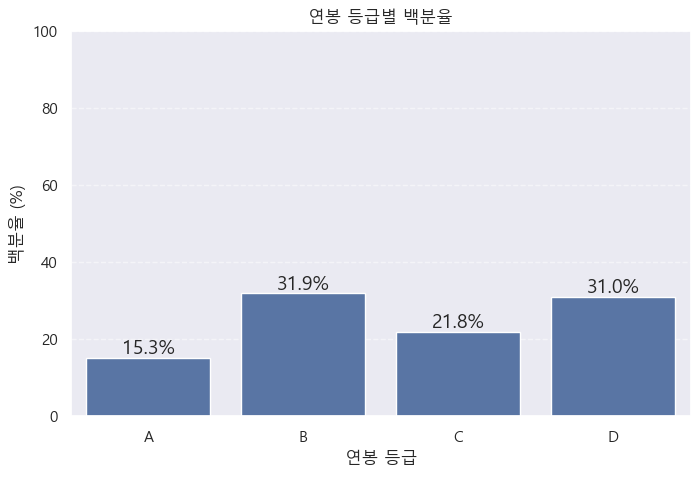

In [21]:
# 1. 원하는 등급 순서대로 labels 지정 (A, B, C, D 순서)
labels = ['A', 'B', 'C', 'D']

# 2. 연봉등급별 백분율 계산 (labels 순서대로 reindex)
grade_pct = (
    player_all_data['연봉등급']
    .value_counts(normalize=True)
    .reindex(labels, fill_value=0)
    * 100
)

# 3. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_pct.index, y=grade_pct.values)
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('연봉 등급별 백분율')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

In [22]:
player_all_data.to_csv('투수_스탯_연봉_파생변수(등급).csv', index=False)